# Exploratory Data Analysis (EDA): Games Dataset


## 1. Caricamento e Preprocessing

In [15]:
import pandas as pd
import ast

# Caricamento del dataset
games_df = pd.read_csv("../data/raw/games.csv")

# Parsing dei campi JSON-like
def parse_list_column(col):
    return col.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and isinstance(x, str) else [])

json_cols = ['developers', 'publishers', 'themes', 'platforms', 'screenshots']
for col in json_cols:
    games_df[col] = parse_list_column(games_df[col])

# Conversione del campo data
games_df["releaseDate"] = pd.to_datetime(games_df["releaseDate"], errors='coerce')

# Rimozione della colonna ridondante
if "_class" in games_df.columns:
    games_df.drop(columns=["_class"], inplace=True)

games_df.head()

,_id,title,releaseDate,rating,genre,developers,publishers,themes,platforms,metaScore,metaScoreCount,description,storyline,summary,cover,video,userScore,reviewCount,screenshots
0,6807a1905d04121deaab7d9e,Perfect Dark (2000),2000-05-22,M,FPS,[Rare Ltd.],"[Rare Ltd., Xbox Game Studios, Nintendo]","[Action, Stealth, Shooter, Science fiction]","[Nintendo 64, Xbox 360]",97.0,30.0,[Xbox Live Arcade] Agent Joanna Dark hit the ...,Perfect Dark is a first-person shooter video g...,Perfect Dark is a first-person shooter video g...,//images.igdb.com/igdb/image/upload/t_1080p/co...,https://www.youtube.com/watch?v=VuGZ2n6VcYQ,93.0,33,[//images.igdb.com/igdb/image/upload/t_1080p/w...
1,6807a1905d04121deaab7db0,The Elder Scrolls V: Skyrim,2011-11-11,M,Western RPG,[Bethesda Game Studios],[Bethesda Softworks],"[Sandbox, Open world, Role-playing (RPG), Stea...","[Xbox 360, PC, PlayStation 3]",96.0,89.0,The next chapter in the Elder Scrolls saga arr...,The Empire of Tamriel is on the edge. The High...,Skyrim reimagines and revolutionizes the open-...,//images.igdb.com/igdb/image/upload/t_1080p/co...,https://www.youtube.com/watch?v=2doLV4hNMIg,82.0,835,[//images.igdb.com/igdb/image/upload/t_1080p/x...
2,6807a1905d04121deaab7db1,Half-Life,1998-11-19,M,FPS,[Valve Software],"[Sierra Entertainment, Valve Software]","[Adventure, Warfare, Action, Horror, Thriller,...","[PC, PlayStation 2]",96.0,24.0,Half-Life combines great storytelling in the t...,Dr. Gordon Freeman arrives late for work at 8:...,"Dr. Gordon Freeman doesn't speak, but he's got...",//images.igdb.com/igdb/image/upload/t_1080p/co...,https://www.youtube.com/watch?v=qobDF0w5qJc,91.0,142,[//images.igdb.com/igdb/image/upload/t_1080p/b...
3,6807a1905d04121deaab7db6,Baldur's Gate II: Shadows of Amn,2000-09-24,T,Western RPG,[BioWare],"[Interplay, Sega, Virgin Interactive, Atari Co...","[Fantasy, Role-playing (RPG)]",[PC],95.0,30.0,An epic continuation of the story that began i...,Some time after the events described in Baldur...,Every World has conflict. Good and evil. Frien...,//images.igdb.com/igdb/image/upload/t_1080p/co...,https://www.youtube.com/watch?v=QMhQxW_WQwA,97.0,40,[//images.igdb.com/igdb/image/upload/t_1080p/y...
4,6807a1905d04121deaab7dd7,Resident Evil Code: Veronica,2000-02-29,M,Survival,[NexTech],"[Capcom, Eidos Interactive, Tec Toy]","[Action, Survival, Adventure, Puzzle, Horror, ...",[Dreamcast],94.0,18.0,Resident Evil Code: Veronica takes up the stor...,Three months after the events of Resident Evil...,Resident Evil Code: Veronica is the fourth vid...,//images.igdb.com/igdb/image/upload/t_1080p/co...,https://www.youtube.com/watch?v=zWRlfGuCL-Q,94.0,5,[//images.igdb.com/igdb/image/upload/t_1080p/s...


## 2. Esplorazione e Statistiche Generali

In [17]:
games_df.info()

games_df.describe(include="all")

print("Statistiche sulla releaseDate:")
print("Data minima:", games_df["releaseDate"].min())
print("Data massima:", games_df["releaseDate"].max())
print("Anni unici:", games_df["releaseDate"].dt.year.nunique())

games_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   _id             3044 non-null   object        
 1   title           3044 non-null   object        
 2   releaseDate     3044 non-null   datetime64[ns]
 3   rating          3044 non-null   object        
 4   genre           3044 non-null   object        
 5   developers      3044 non-null   object        
 6   publishers      3044 non-null   object        
 7   themes          3044 non-null   object        
 8   platforms       3044 non-null   object        
 9   metaScore       3044 non-null   float64       
 10  metaScoreCount  3044 non-null   float64       
 11  description     3044 non-null   object        
 12  storyline       3044 non-null   object        
 13  summary         3044 non-null   object        
 14  cover           3044 non-null   object        
 15  vide

_id               0
title             0
releaseDate       0
rating            0
genre             0
developers        0
publishers        0
themes            0
platforms         0
metaScore         0
metaScoreCount    0
description       0
storyline         0
summary           0
cover             0
video             0
userScore         0
reviewCount       0
screenshots       0
dtype: int64

### 2.4 Cardinalità Colonne

In [18]:
from collections import Counter

# Colonne che contengono liste
list_cols = ['developers', 'publishers', 'themes', 'platforms', 'screenshots']

# 1. Cardinalità delle colonne non-lista
non_list_cols = [col for col in games_df.columns if col not in list_cols]
cardinalita_non_lista = games_df[non_list_cols].nunique().sort_values(ascending=False)

# 2. Cardinalità delle colonne lista (flattening + conteggio unici)
cardinalita_lista = {}
for col in list_cols:
    elementi = sum(games_df[col], [])  # Flatten della lista di liste
    cardinalita_lista[col] = len(set(elementi))

# 3. Combinazione e visualizzazione
cardinalita_totale = pd.concat([
    cardinalita_non_lista,
    pd.Series(cardinalita_lista).sort_values(ascending=False)
])

cardinalita_totale.name = "Cardinalità"
cardinalita_totale = cardinalita_totale.to_frame()
cardinalita_totale


,Cardinalità
_id,3044
title,3044
description,3031
cover,3031
summary,3026
video,3021
storyline,3002
releaseDate,1958
reviewCount,319
metaScoreCount,126


## 3. Piattaforme più popolari

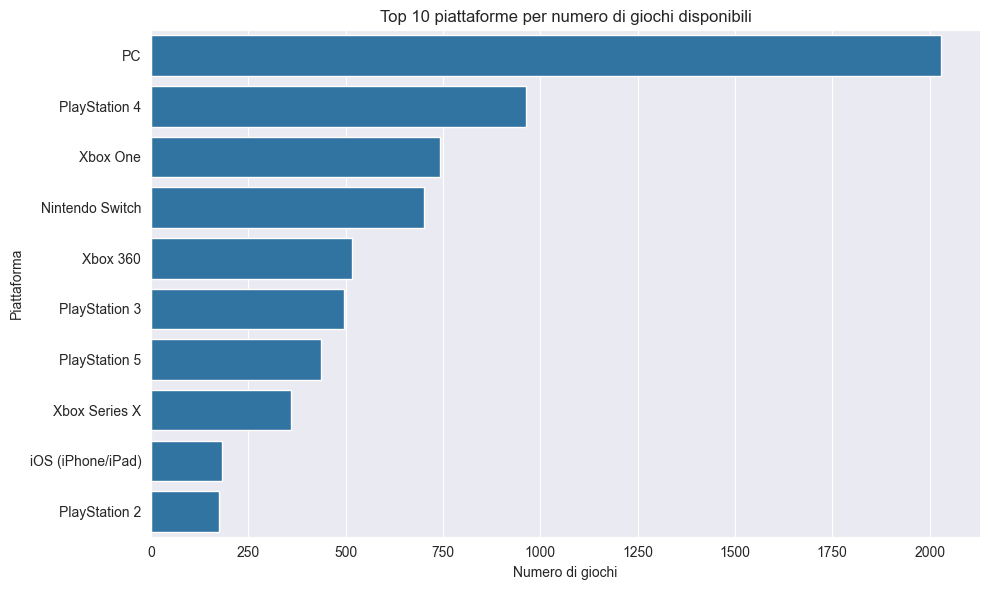

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Conteggio delle piattaforme
all_platforms = sum(games_df["platforms"], [])
platform_counts = Counter(all_platforms)
top_platforms = dict(platform_counts.most_common(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_platforms.values()), y=list(top_platforms.keys()))
plt.title("Top 10 piattaforme per numero di giochi disponibili")
plt.xlabel("Numero di giochi")
plt.ylabel("Piattaforma")
plt.tight_layout()
plt.show()

## 4. Generi e Temi più Diffusi

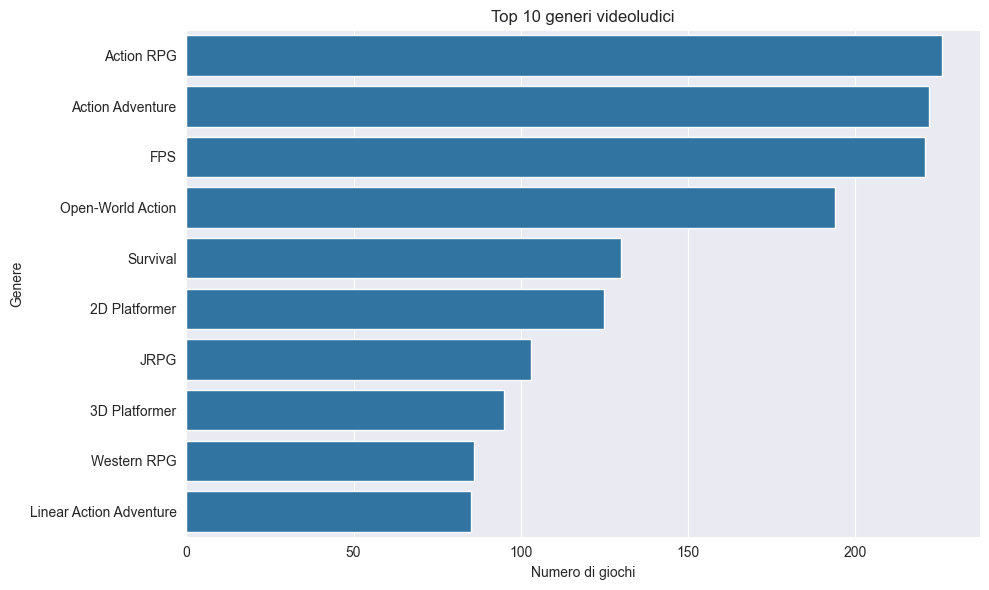

In [10]:
# Generi
genre_counts = games_df['genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 10 generi videoludici")
plt.xlabel("Numero di giochi")
plt.ylabel("Genere")
plt.tight_layout()
plt.show()

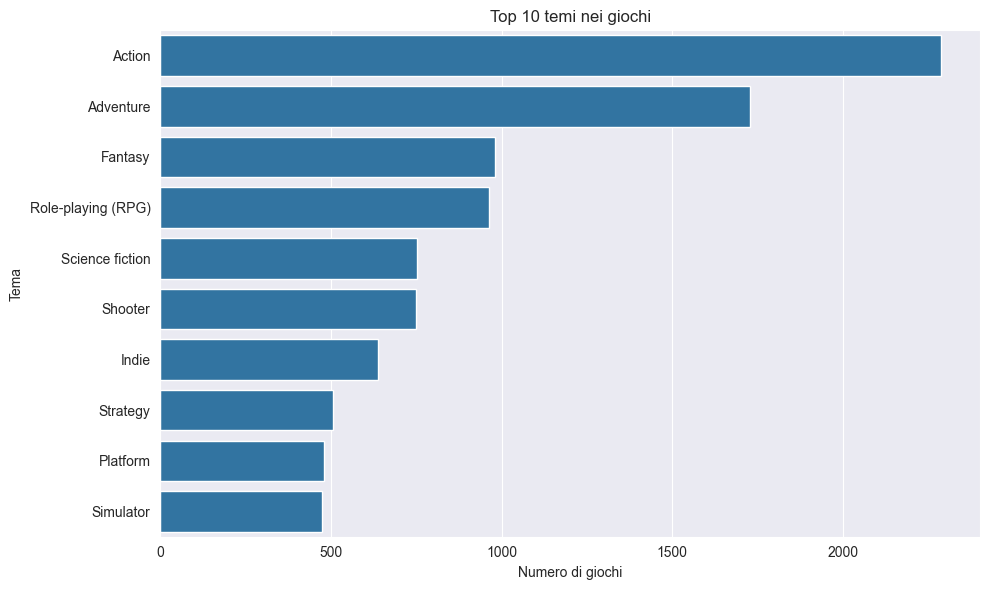

In [11]:
# Temi
all_themes = sum(games_df["themes"], [])
theme_counts = Counter(all_themes).most_common(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=[c[1] for c in theme_counts], y=[c[0] for c in theme_counts])
plt.title("Top 10 temi nei giochi")
plt.xlabel("Numero di giochi")
plt.ylabel("Tema")
plt.tight_layout()
plt.show()


## 5. Valutazioni Critiche e Utente

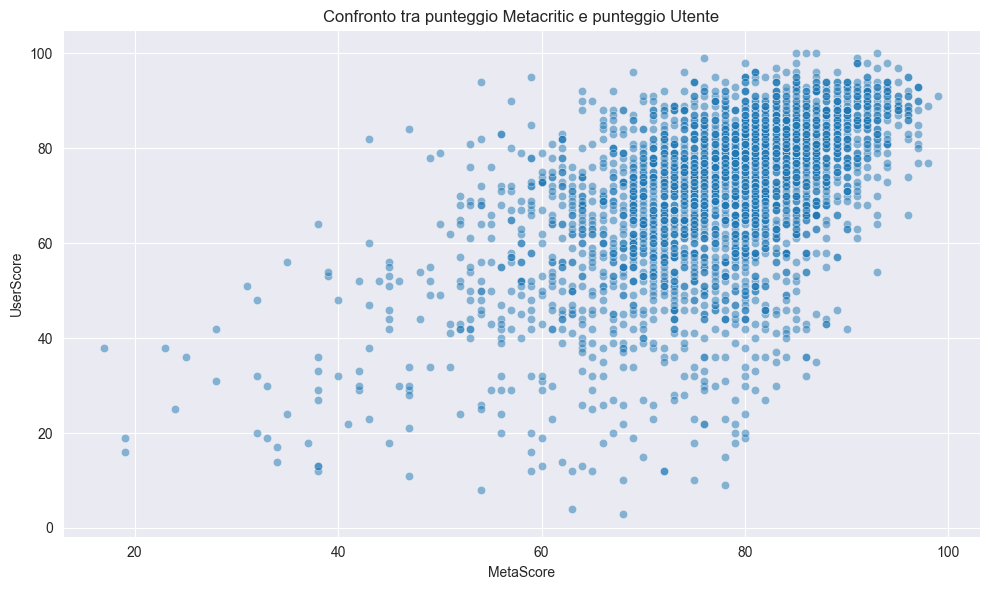

In [12]:
# Metascore vs UserScore
plt.figure(figsize=(10, 6))
sns.scatterplot(data=games_df, x="metaScore", y="userScore", alpha=0.5)
plt.title("Confronto tra punteggio Metacritic e punteggio Utente")
plt.xlabel("MetaScore")
plt.ylabel("UserScore")
plt.grid(True)
plt.tight_layout()
plt.show()


## 6. Frequenza di Rilascio nel Tempo

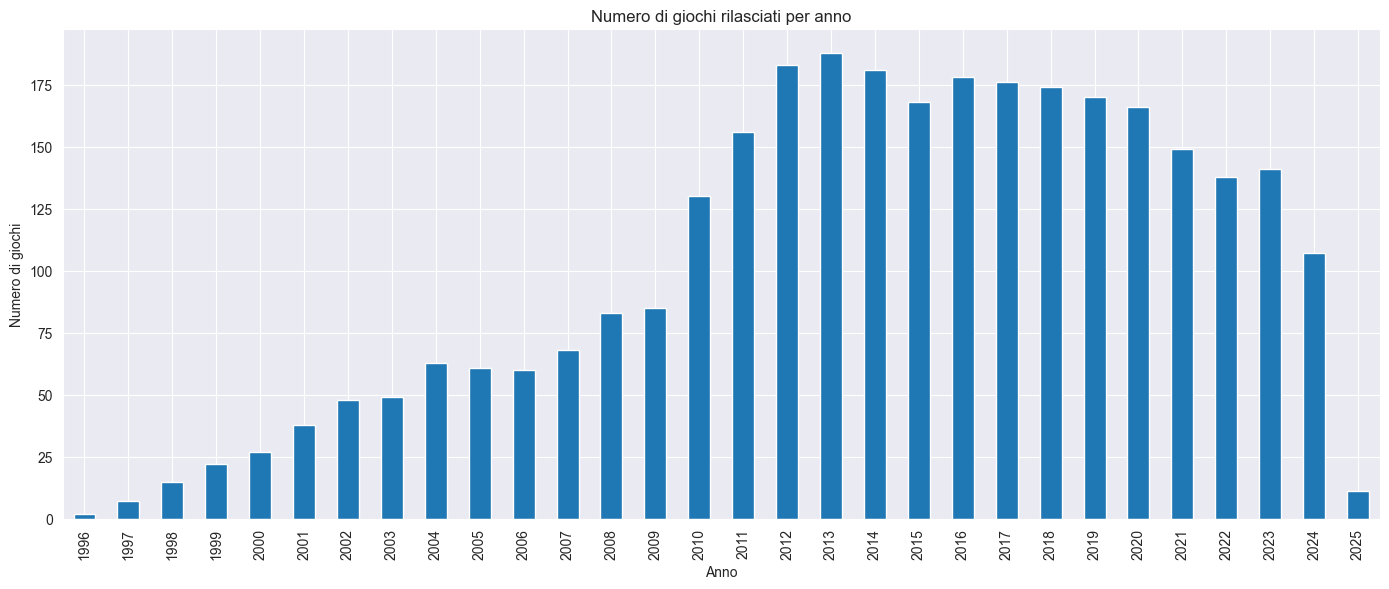

In [19]:
release_counts = games_df["releaseDate"].dt.year.value_counts().sort_index()

plt.figure(figsize=(14, 6))
release_counts.plot(kind="bar")
plt.title("Numero di giochi rilasciati per anno")
plt.xlabel("Anno")
plt.ylabel("Numero di giochi")
plt.tight_layout()
plt.show()
